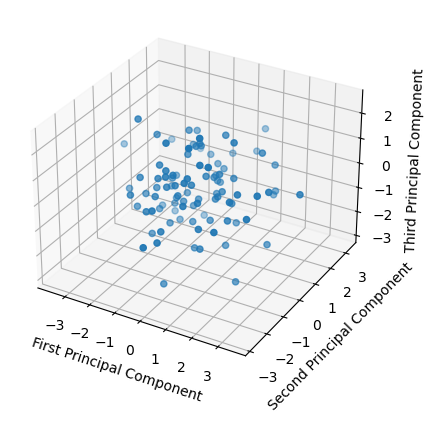

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some sample data
np.random.seed(42)
X = np.random.randn(100, 10)

# Step 1: Standardize the dataset (optional)
X_standardized = (X - X.mean(axis=0)) / X.std(axis=0)

# Step 2: Calculate the covariance matrix
cov_matrix = np.cov(X_standardized.T)

# Step 3: Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort the eigenvalues and corresponding eigenvectors in decreasing order
eigenvalue_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[eigenvalue_indices]
sorted_eigenvectors = eigenvectors[:, eigenvalue_indices]

# Step 5: Select the top k eigenvectors (k is the number of principal components)
k = 3
top_k_eigenvectors = sorted_eigenvectors[:, :k]

# Step 6: Project the original data onto the top k eigenvectors
X_pca = np.dot(X_standardized, top_k_eigenvectors)

# Visualize the result in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.show()


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\nnnam1\scikit_learn_data


c:\users\nnnam1\tf_tts_env\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
c:\users\nnnam1\tf_tts_env\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\users\nnnam1\tf_tts_env\lib\site-packages\matplotlib\collections.py:551: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asanyarray(self.convert_xunits(offsets[:, 0]), float),
c:\users\nnnam1\tf_tts_env\lib\site-packages\matplotlib\collections.py:552: ComplexWarning: Casting complex values to real discards the imaginary part
  np.asanyarray(self.convert_yunits(offsets[:, 1]), float)))
c:\users\nnnam1\tf_tts_env\lib\site-packages\matplotlib\colors.py:389: ComplexWarning: Casting complex values to real discards the imaginary part
  c = tuple(map(float, c))


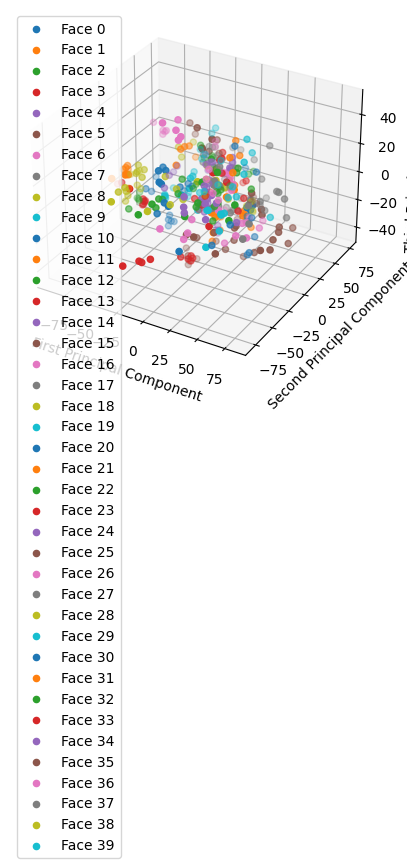

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from mpl_toolkits.mplot3d import Axes3D

def pca_from_scratch(X, n_components):
    X_standardized = (X - X.mean(axis=0)) / X.std(axis=0)
    cov_matrix = np.cov(X_standardized.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    eigenvalue_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, eigenvalue_indices]
    top_k_eigenvectors = sorted_eigenvectors[:, :n_components]
    X_pca = np.dot(X_standardized, top_k_eigenvectors)
    return X_pca

# Load the Olivetti faces dataset (grayscale images of size 64x64)
data = fetch_olivetti_faces()
images = data.images
targets = data.target

# Reshape the images to 1D arrays (4096 features)
X = images.reshape((images.shape[0], -1))

# Apply PCA from scratch to reduce dimensionality to 3 components
n_components = 3
X_pca = pca_from_scratch(X, n_components)

# Visualize the result in a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for target in np.unique(targets):
    mask = targets == target
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], X_pca[mask, 2], label=f'Face {target}')

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.legend()
plt.show()


In [11]:
n_components = 1000
X_pca = pca_from_scratch(X, n_components)

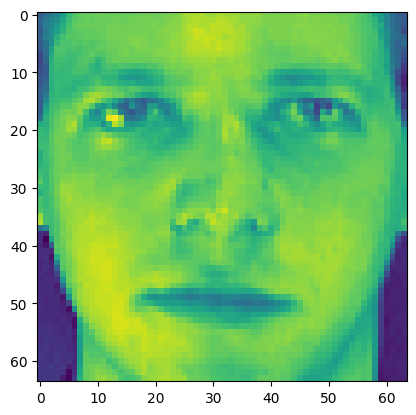

In [8]:
plt.imshow(images[0])

In [9]:
X_pca

array([[ 45.26837974+0.j,   2.17394644+0.j, -21.81839729+0.j],
       [ 11.86003686+0.j,  41.95491045+0.j,   3.10510875+0.j],
       [ 39.27399127+0.j,   7.27784437+0.j, -11.94020124+0.j],
       ...,
       [-10.81211064+0.j,   9.58496726+0.j,  24.19494596+0.j],
       [ 36.93931703+0.j, -56.96338996+0.j,  -5.20919631+0.j],
       [  8.68293627+0.j, -15.29022361+0.j,   9.25133724+0.j]])

In [1]:
import numpy as np 
from scipy import misc    
import imageio # for loading image

In [2]:
!mkdir unpadded

In [40]:
path ="faces"
ids = range(1, 16) # 15 persons
states = ['centerlight', 'glasses', 'happy', 'leftlight', 
          'noglasses', 'normal', 'rightlight','sad', 
          'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.pgm'
fn = path +"\\"+ prefix + str(1).zfill(2) + '.' + "sleepy" + surfix
im = imageio.imread(fn)
h = 243 # hight 
w = 320 # width
D = h * w
N = len(states)*15 

X = np.zeros((D, N))
# collect all data
cnt = 0 
for person_id in range(1, 16):
    for state in states:
        fn = path +"\\"+ prefix + str(person_id).zfill(2) + '.' + state + surfix
        X[:, cnt] = imageio.imread(fn).reshape(D)
        cnt += 1

C:\Users\OS\AppData\Local\Temp\ipykernel_15144\1198339575.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(fn)
C:\Users\OS\AppData\Local\Temp\ipykernel_15144\1198339575.py:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  X[:, cnt] = imageio.imread(fn).reshape(D)


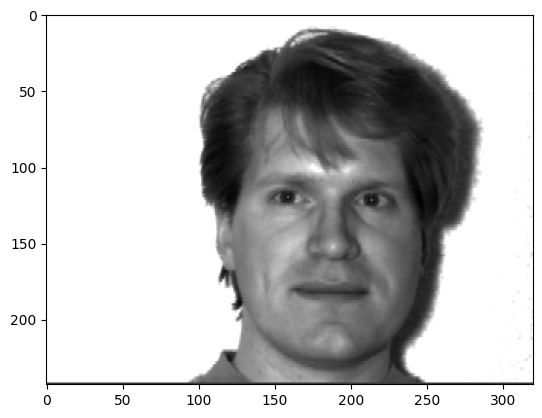

In [63]:
plt.imshow(im)

In [10]:
def pca_from_scratch(X, n_components):
    X_standardized = (X - X.mean(axis=0)) / X.std(axis=0)
    cov_matrix = np.cov(X_standardized.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    eigenvalue_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, eigenvalue_indices]
    top_k_eigenvectors = sorted_eigenvectors[:, :n_components]
    X_pca = np.dot(X_standardized, top_k_eigenvectors)
    return X_pca

In [91]:
X.shape

(77760, 165)

In [92]:
X_standardized = (X - X.mean(axis=0))

In [93]:
X_standardized

array([[ -54.46459619,  -70.72350823,  -68.4869213 , ...,  -54.55394805,
         -50.63674126,  -60.3901749 ],
       [ -54.46459619,  -70.72350823,  -68.4869213 , ...,  -54.55394805,
         -50.63674126,  -60.3901749 ],
       [ -54.46459619,  -70.72350823,  -68.4869213 , ...,  -54.55394805,
         -50.63674126,  -60.3901749 ],
       ...,
       [-116.46459619, -132.72350823, -130.4869213 , ..., -116.55394805,
        -112.63674126, -122.3901749 ],
       [-116.46459619, -132.72350823, -130.4869213 , ..., -116.55394805,
        -112.63674126, -122.3901749 ],
       [-116.46459619, -132.72350823, -130.4869213 , ..., -116.55394805,
        -112.63674126, -122.3901749 ]])

In [ ]:
S = 

In [90]:
 X.mean(axis=0).shape

(165,)

In [89]:
X_pca.shape

(77760, 100)

In [84]:
X[:, 0].shape

(77760,)

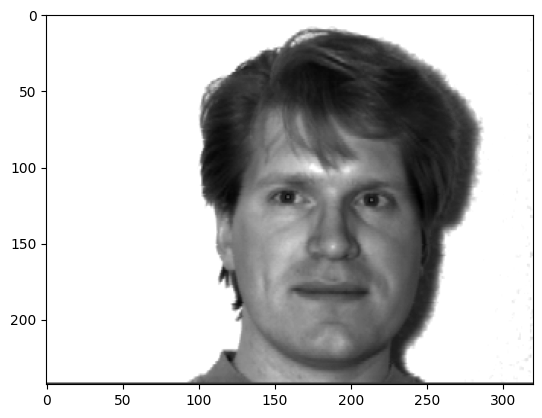

In [86]:
plt.imshow(X[:, 0].reshape(243, 320))

In [79]:
X_pca = pca_from_scratch(X,100)

In [69]:
X_pca.shape

(77760, 100)

In [ ]:
X_pca

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100) # k = 100 
pca.fit(X.T)

PCA(n_components=100)

In [ ]:
transform

In [7]:
pca.mean_.shape

(77760,)

In [18]:
U = pca.components_.T

In [19]:
U.shape

(77760, 100)

In [76]:
X_pca

array([[-7.79582754e+00+0.j, -1.06913296e+00+0.j, -1.50033211e+00+0.j,
        ..., -1.40913418e-01+0.j, -2.92133849e-02+0.j,
         1.00181551e-01+0.j],
       [-7.67776444e+00+0.j, -1.36530895e+00+0.j, -1.54911478e+00+0.j,
        ..., -1.57371554e-01+0.j, -4.41478620e-02+0.j,
         1.05057376e-01+0.j],
       [-7.59592064e+00+0.j, -1.50055275e+00+0.j, -1.47350542e+00+0.j,
        ..., -1.67078710e-01+0.j, -3.42402725e-02+0.j,
         1.41301866e-01+0.j],
       ...,
       [-1.56354102e+01+0.j, -1.50625353e+00+0.j, -1.11557246e+00+0.j,
        ..., -1.28957957e-01+0.j, -1.04714522e-03+0.j,
         1.09137979e-01+0.j],
       [-1.56354102e+01+0.j, -1.50625353e+00+0.j, -1.11557246e+00+0.j,
        ..., -1.28957957e-01+0.j, -1.04714522e-03+0.j,
         1.09137979e-01+0.j],
       [-1.56354102e+01+0.j, -1.50625353e+00+0.j, -1.11557246e+00+0.j,
        ..., -1.28957957e-01+0.j, -1.04714522e-03+0.j,
         1.09137979e-01+0.j]])

In [36]:
X.T.mean(axis=0)

array([122.75757576, 123.50909091, 123.77575758, ...,  68.        ,
        68.        ,  68.        ])

In [33]:
pca.mean_[0]

122.75757575757575

C:\Users\OS\AppData\Local\Temp\ipykernel_15144\864713718.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(fn)


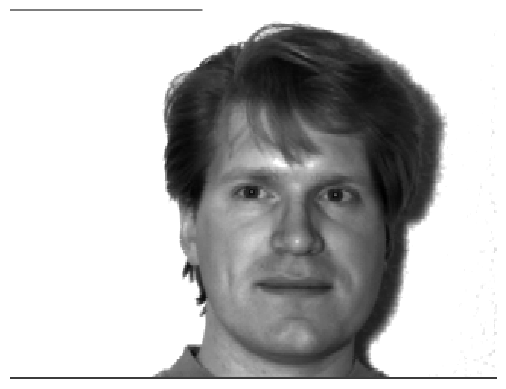

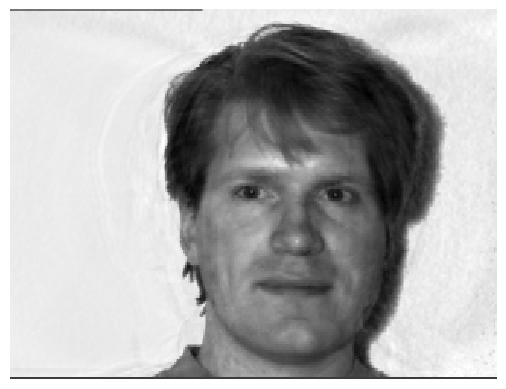

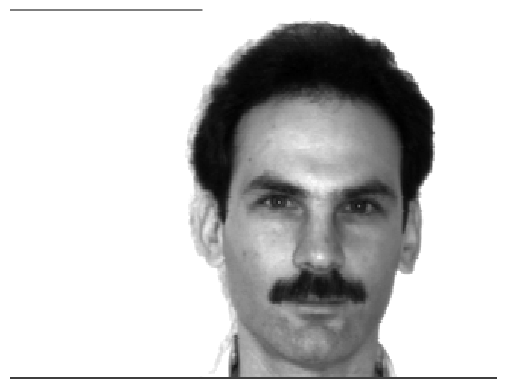

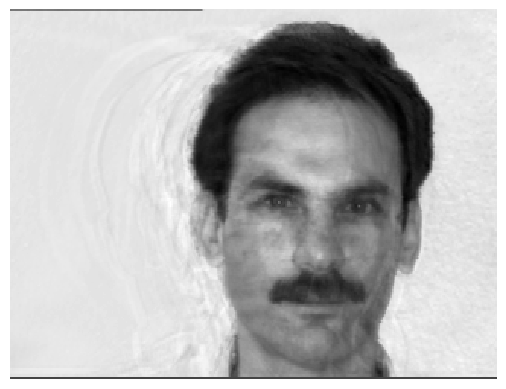

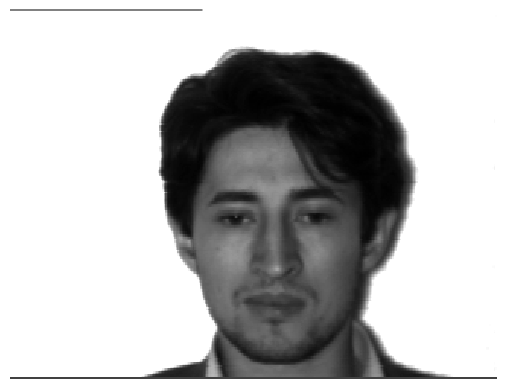

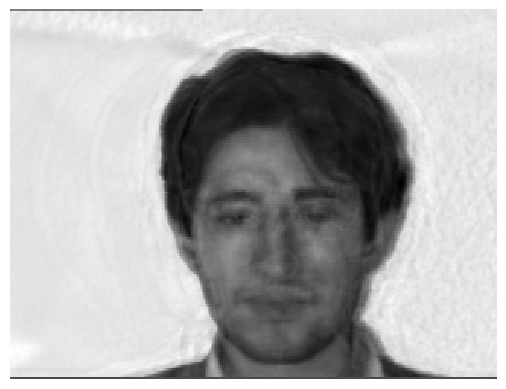

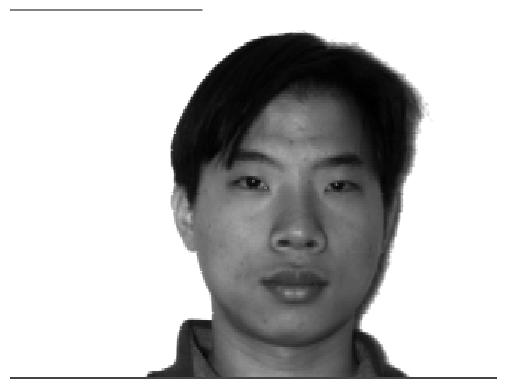

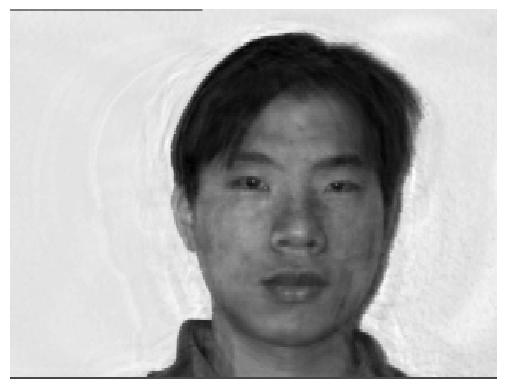

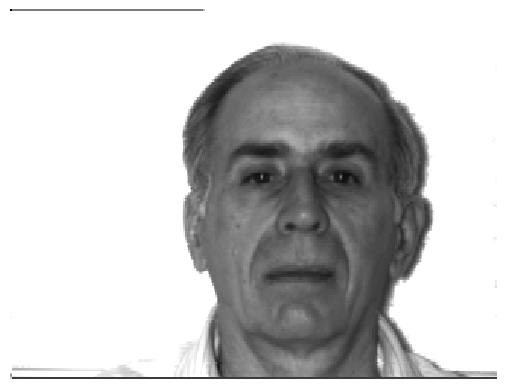

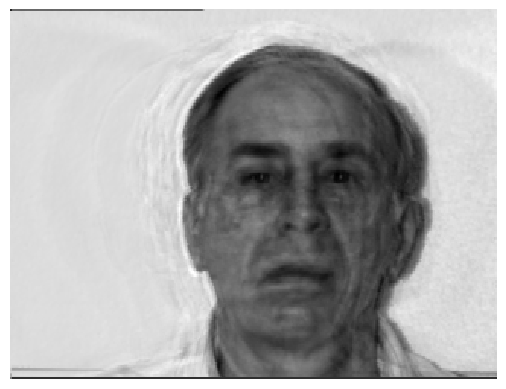

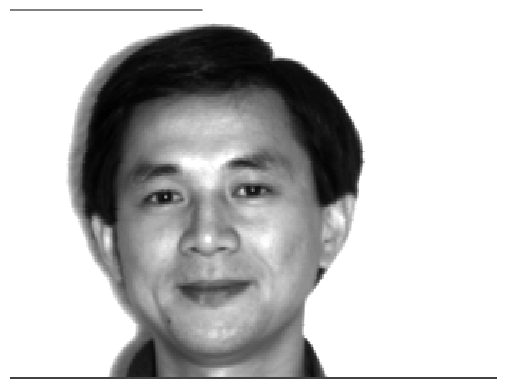

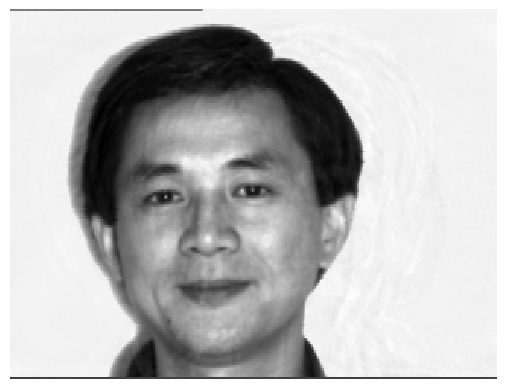

In [21]:
for person_id in range(1, 7):
    for state in ['centerlight']:
        fn = path+ "\\"+ prefix + str(person_id).zfill(2) + '.' + state + surfix
        im = imageio.imread(fn)
        plt.axis('off')
#         plt.imshow(im, interpolation='nearest' )
        f1 = plt.imshow(im, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
        fn = 'ori' + str(person_id).zfill(2) + '.png'
#         plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()
        # reshape and subtract mean, don't forget 
        x = im.reshape(D, 1) - pca.mean_.reshape(D, 1)
        # encode
        z = U.T.dot(x)
        #decode
        x_tilde = U.dot(z) + pca.mean_.reshape(D, 1)

        # reshape to orginal dim
        im_tilde = x_tilde.reshape(243, 320)
        plt.axis('off')
#         plt.imshow(im_tilde, interpolation='nearest' )
        f1 = plt.imshow(im_tilde, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
        fn = 'res' + str(person_id).zfill(2) + '.png'
#         plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()

In [23]:
x_tilde.shape

(77760, 1)

In [25]:
im.shape

(243, 320)

In [26]:
x.shape

(77760, 1)

In [39]:
import numpy as np

def standardize_data(X):
    mean = np.mean(X, axis=0)
#     std_dev = np.std(X, axis=0)
    return X - mean

# def standardize_data(X):
#     mean = np.mean(X, axis=0)
#     std_dev = np.std(X, axis=0)
#     return (X - mean) / std_dev


def compute_covariance_matrix(X):
    return np.cov(X.T)

def PCA(X, n_components):
    # Step 1: Standardize the data
    X_std = standardize_data(X)
    
    # Step 2: Compute the covariance matrix
    covariance_matrix = compute_covariance_matrix(X_std)
    
    # Step 3: Calculate eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Step 4: Sort eigenvectors based on eigenvalues
    eig_pairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(len(eigenvalues))]
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    
    # Step 5: Select top n_components eigenvectors to form the projection matrix
    projection_matrix = np.hstack([pair[1].reshape(-1, 1) for pair in eig_pairs[:n_components]])
    
    # Step 6: Transform the original dataset using the projection matrix
    return X_std @ projection_matrix

# Example usage
# X = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2], [3.1, 3.0], [2.3, 2.7], [2, 1.6], [1, 1.1], [1.5, 1.6], [1.1, 0.9]])
# n_components = 2

transformed_data = PCA(X, n_components)
print(transformed_data)


[[-0.82797019 -0.17511531]
 [ 1.77758033  0.14285723]
 [-0.99219749  0.38437499]
 [-0.27421042  0.13041721]
 [-1.67580142 -0.20949846]
 [-0.9129491   0.17528244]
 [ 0.09910944 -0.3498247 ]
 [ 1.14457216  0.04641726]
 [ 0.43804614  0.01776463]
 [ 1.22382056 -0.16267529]]


In [47]:
transformed_data = PCA(X.T, 100)

MemoryError: Unable to allocate 45.1 GiB for an array with shape (77760, 77760) and data type float64

In [77]:
import numpy as np

def power_iteration(X, max_iter=1000, tol=1e-6):
    v = np.random.rand(X.shape[1])
    v = v / np.linalg.norm(v)

    for _ in range(max_iter):
        u = X @ v
        u = u / np.linalg.norm(u)
        v_new = X.T @ u
        v_new = v_new / np.linalg.norm(v_new)

        if np.linalg.norm(v_new - v) < tol:
            break

        v = v_new

    eig_val = u.T @ (X @ v)
    return eig_val, v


def power_method_pca(X_std, n_components):
    eig_vals = []
    eig_vecs = []

    for _ in range(n_components):
        eig_val, eig_vec = power_iteration(X_std)
        eig_vals.append(eig_val)
        eig_vecs.append(eig_vec)

        X_std = X_std - (X_std @ eig_vec[:, np.newaxis]) @ eig_vec[np.newaxis, :]

    return np.array(eig_vals), np.array(eig_vecs).T


# Your provided code snippet
# X_std = ...  # Standardized data matrix
# n_components = ...  # Desired number of principal components

# # Eigendecomposition using power method
# eig_vals, eig_vecs = power_method_pca(X_std, n_components)


In [79]:
eig_vals

NameError: name 'eig_vals' is not defined

In [78]:
class MyPCA:
    
    def __init__(self, n_components):
        self.n_components = n_components   
        
    def fit(self, X):
        # Standardize data 
        X = X.copy()
        self.mean = np.mean(X, axis = 0)
#         self.scale = np.std(X, axis = 0)
        X_std = X - self.mean
        
        # Eigendecomposition of covariance matrix       
#         cov_mat = np.cov(X_std.T)
#         eig_vals, eig_vecs = np.linalg.eig(cov_mat) 
        eig_vals, eig_vecs = power_method_pca(X_std, n_components)
        
        # Adjusting the eigenvectors that are largest in absolute value to be positive    
        max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
        signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
        eig_vecs = eig_vecs*signs[np.newaxis,:]
        eig_vecs = eig_vecs.T
       
        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        eig_vals_sorted = np.array([x[0] for x in eig_pairs])
        eig_vecs_sorted = np.array([x[1] for x in eig_pairs])
        
        self.components = -eig_vecs_sorted[:self.n_components,:]
        
        # Explained variance ratio
        self.explained_variance_ratio = [i/np.sum(eig_vals) for i in eig_vals_sorted[:self.n_components]]
        
        self.cum_explained_variance = np.cumsum(self.explained_variance_ratio)

        return self

    def transform(self, X):
        X = X.copy()
        X_std = (X - self.mean) / self.scale
        X_proj = X_std.dot(self.components.T)
        
        return X_proj
# ---------------------------------------------------------
my_pca = MyPCA(n_components = 2).fit(X)

print('Components:\n', my_pca.components)
# print('Explained variance ratio from scratch:\n', my_pca.explained_variance_ratio)
# print('Cumulative explained variance from scratch:\n', my_pca.cum_explained_variance)

# X_proj = my_pca.transform(X)
# print('Transformed data shape from scratch:', X_proj.shape)

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (2,) (165,) 

In [49]:
X.shape

(77760, 165)

In [72]:
np.sum((np.float64(my_pca.components)+pca.components_))

C:\Users\OS\AppData\Local\Temp\ipykernel_15144\4001751581.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  np.sum((np.float64(my_pca.components)+pca.components_))


4.2319907344115504e-13

In [76]:
# from sklearn.preprocessing import StandardScaler
# X_std = StandardScaler().fit_transform(X)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X.T)

print('Components:\n', pca.components_)
# print('Explained variance ratio:\n', pca.explained_variance_ratio_)

# cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
# print('Cumulative explained variance:\n', cum_explained_variance)

# X_pca = pca.transform(X_std) # Apply dimensionality reduction to X.
# print('Transformed data shape:', X_pca.shape)

# plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y)
# plt.xlabel('PC1'); plt.xticks([])
# plt.ylabel('PC2'); plt.yticks([])
# plt.title('2 components, captures {}% of total variation'.format(cum_explained_variance[1].round(4)*100))
# plt.show()

Components:
 [[-0.00031565 -0.00059151 -0.00069669 ...  0.          0.
   0.        ]
 [-0.00106202 -0.00124786 -0.00128815 ... -0.         -0.
  -0.        ]]


In [66]:
pca.components_.dtype

dtype('float64')